In [1]:
# !pip install scikit-plot

import numpy as np
import pandas as pd

from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import roc_auc_score, average_precision_score
from sklearn.linear_model import LogisticRegression

import scikitplot as skplt
import matplotlib
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE
from itertools import groupby

import pickle

Using TensorFlow backend.


# Leitura dos Dados


In [ ]:
df_TRN = pd.read_csv('../input/projeto-rn/TRN.csv', sep='\t', index_col=0)
df_TRN.drop_duplicates(inplace=True)

In [ ]:
df_TRN.head()

In [ ]:
df_TRN.describe()

In [ ]:
# IND_BOM_1_1 e IND_BOM_1_2 indicam quem é bom pagador e quem não, como uma é o inverso da outra, basta utilizar somente uma delas

classe1 = df_TRN[df_TRN['IND_BOM_1_1'] == 0]
classe2 = df_TRN[df_TRN['IND_BOM_1_1'] == 1]
# # classe1.to_csv('classe1.csv')
# classe2.to_csv('classe2.csv')

# # from google.colab import files
# # files.download('classe1.csv')
# # files.download('classe2.csv')

# uploaded = drive.CreateFile({'title': 'classe2.csv'})
# uploaded.SetContentFile('classe2.csv')
# uploaded.Upload()
# print('Uploaded file with ID {}'.format(uploaded.get('id')))

In [ ]:
# link = 'https://drive.google.com/open?id=1xQCTHhAbjW6YXhjgwSx0yrHnRtwy-Kjg'
# fluff, id = link.split('=')
# downloaded = drive.CreateFile({'id':id}) 
# downloaded.GetContentFile('classe1.csv')  
df_classe1 = pd.read_csv('../input/projeto-rn2/classe1.csv', sep=',', index_col=0)

In [ ]:
df_classe1.head()

In [ ]:
# link = 'https://drive.google.com/open?id=13phTJn2_mNv7n_LHE5BsHVEnBcKod3IQ'
# fluff, id = link.split('=')
# downloaded = drive.CreateFile({'id':id}) 
# downloaded.GetContentFile('classe2.csv')  
df_classe2 = pd.read_csv('../input/projeto-rn2/classe2.csv', sep=',', index_col=0)

In [ ]:
df_classe2.head()

# Divisão dos Dados em Treino, Validação, e Teste


In [ ]:
# X = df_TRN.drop(['INDEX', 'IND_BOM_1_1', 'IND_BOM_1_2'], axis = 1)
# y = df_TRN[['IND_BOM_1_1']]

X1 = df_classe1.iloc[:, 0:-2].values
y1 = df_classe1.iloc[:, -2].values

X2 = df_classe2.iloc[:, 0:-2].values
y2 = df_classe2.iloc[:, -2].values

In [ ]:
## Treino: 50%, Validação: 25%, Teste: 25%
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=1/4, 
                                                    random_state=42, stratify=y1)

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=1/4,
                                                  random_state=42, stratify=y2)
# X_test = np.concatenate((X1_test,X2_test))
# y_test = np.concatenate((y1_test,y2_test))

In [ ]:
# # with open('X_test.pickle', 'wb') as fp:
# #   pickle.dump(X_test, fp)

# with open('y_test.pickle', 'wb') as fp:
#   pickle.dump(y_test, fp)

# uploaded = drive.CreateFile({'title': 'y_test.pickle'})
# uploaded.SetContentFile('y_test.pickle')
# uploaded.Upload()

In [8]:
# link = 'https://drive.google.com/open?id=1NNLtB_i51PzRcXqHnifqrebLsyF1megE'
# fluff, id = link.split('=')
# downloaded = drive.CreateFile({'id':id}) 
# downloaded.GetContentFile('X_test.pickle')

pickle_off = open('Projeto-Redes_Neurais/data/X_test.pickle',"rb")
X_test = pickle.load(pickle_off)

In [7]:
# link = 'https://drive.google.com/open?id=1-j1DgCDKlR00TGtRGtVFNfDzTyI1se5_'
# fluff, id = link.split('=')
# downloaded = drive.CreateFile({'id':id}) 
# downloaded.GetContentFile('y_test.pickle')

pickle_off = open('Projeto-Redes_Neurais/data/y_test.pickle', 'rb')
y_test = pickle.load(pickle_off)
y_test

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [ ]:
# for i in range(5):
#   X1_train, X1_val, y1_train, y1_val = train_test_split(X1_train, y1_train, test_size=1/3, 
#                                                   random_state=42, stratify=y1_train)
  
#   X2_train, X2_val, y2_train, y2_val = train_test_split(X2_train, y2_train, test_size=1/3,
#                                                   random_state=42, stratify=y2_train)
  
#   X_train = np.concatenate((X1_train,X2_train))
#   y_train = np.concatenate((y1_train,y2_train))
  
#   X_val = np.concatenate((X1_val,X2_val))
#   y_val = np.concatenate((y1_val,y2_val))
  
#   path_Xtrain = 'X_train' + str(i) + '.pickle'
#   path_ytrain = 'y_train' + str(i) + '.pickle'
#   path_Xval = 'X_val' + str(i) + '.pickle'
#   path_yval = 'y_val' + str(i) + '.pickle'
  
  
#   with open(path_Xtrain, 'wb') as fp:
#     pickle.dump(X_train, fp)
  
#   with open(path_ytrain, 'wb') as fp:
#     pickle.dump(y_train, fp)
  
#   with open(path_Xval, 'wb') as fp:
#     pickle.dump(X_val, fp)
  
#   with open(path_yval, 'wb') as fp:
#     pickle.dump(y_val, fp)

#   uploaded = drive.CreateFile({'title': path_Xtrain})
#   uploaded.SetContentFile(path_Xtrain)
#   uploaded.Upload()
  
#   uploaded = drive.CreateFile({'title': path_ytrain})
#   uploaded.SetContentFile(path_ytrain)
#   uploaded.Upload()
  
#   uploaded = drive.CreateFile({'title': path_Xval})
#   uploaded.SetContentFile(path_Xval)
#   uploaded.Upload()
  
#   uploaded = drive.CreateFile({'title': path_yval})
#   uploaded.SetContentFile(path_yval)
#   uploaded.Upload()

# Sampling e Normalização dos Dados


In [10]:
import os

print(os.listdir('Projeto-Redes_Neurais/data'))

['classe1.csv', 'classe2.csv', 'X_test.pickle', 'X_train0s.pickle', 'X_val0s.pickle', 'y_test.pickle', 'y_train0s.pickle', 'y_val0s.pickle']


In [9]:
# #### BASE 0
# # link = 'https://drive.google.com/open?id=1M4OHrK83fYPTSV4AU8XCrloqIcrrDFep'
# # fluff, id = link.split('=')
# # downloaded = drive.CreateFile({'id':id}) 
# # downloaded.GetContentFile('X_train0.pickle')

# pickle_off = open('Projeto-Redes_Neurais/data/X_train0.pickle', 'rb')
# X_train0 = pickle.load(pickle_off)

# # link = 'https://drive.google.com/open?id=19D4XVzLLptwHZWF63bfPxegX4fz00EC8'
# # fluff, id = link.split('=')
# # downloaded = drive.CreateFile({'id':id}) 
# # downloaded.GetContentFile('y_train0.pickle')

# pickle_off = open('Projeto-Redes_Neurais/data/y_train0.pickle', 'rb')
# y_train0 = pickle.load(pickle_off)

# # link = 'https://drive.google.com/open?id=1tWOG9vqoJAu5qp4m-XBhjqlp_OxLurF1'
# # fluff, id = link.split('=')
# # downloaded = drive.CreateFile({'id':id}) 
# # downloaded.GetContentFile('X_val0.pickle')

# pickle_off = open('Projeto-Redes_Neurais/data/X_val0.pickle', 'rb')
# X_val0 = pickle.load(pickle_off)

# # link = 'https://drive.google.com/open?id=1g-HiwVCWFf1SxRQAJoWA94wfVesWWoNF'
# # fluff, id = link.split('=')
# # downloaded = drive.CreateFile({'id':id}) 
# # downloaded.GetContentFile('y_val0.pickle')

# pickle_off = open('Projeto-Redes_Neurais/data/y_val0.pickle', 'rb')
# y_val0 = pickle.load(pickle_off)

# # BASE 1

# pickle_off = open('../input/projetorn/X_train1.pickle', 'rb')
# X_train1 = pickle.load(pickle_off)

# pickle_off = open('../input/projetorn/y_train1.pickle', 'rb')
# y_train1 = pickle.load(pickle_off)

# pickle_off = open('../input/projetorn/X_val1.pickle', 'rb')
# X_val1 = pickle.load(pickle_off)

# pickle_off = open('../input/projetorn/y_val1.pickle', 'rb')
# y_val1 = pickle.load(pickle_off)

# # BASE 2

# pickle_off = open('../input/projetorn/X_train2.pickle', 'rb')
# X_train2 = pickle.load(pickle_off)

# pickle_off = open('../input/projetorn/y_train2.pickle', 'rb')
# y_train2 = pickle.load(pickle_off)

# pickle_off = open('../input/projetorn/X_val2.pickle', 'rb')
# X_val2 = pickle.load(pickle_off)

# pickle_off = open('../input/projetorn/y_val2.pickle', 'rb')
# y_val2 = pickle.load(pickle_off)

# # BASE 3

# pickle_off = open('../input/projetorn/X_train3.pickle', 'rb')
# X_train3 = pickle.load(pickle_off)

# pickle_off = open('../input/projetorn/y_train3.pickle', 'rb')
# y_train3 = pickle.load(pickle_off)

# pickle_off = open('../input/projetorn/X_val3.pickle', 'rb')
# X_val3 = pickle.load(pickle_off)

# pickle_off = open('../input/projetorn/y_val3.pickle', 'rb')
# y_val3 = pickle.load(pickle_off)

# # BASE 4

# pickle_off = open('../input/projetorn/X_train4.pickle', 'rb')
# X_train4 = pickle.load(pickle_off)

# pickle_off = open('../input/projetorn/y_train4.pickle', 'rb')
# y_train4 = pickle.load(pickle_off)

# pickle_off = open('../input/projetorn/X_val4.pickle', 'rb')
# X_val4 = pickle.load(pickle_off)

# pickle_off = open('../input/projetorn/y_val4.pickle', 'rb')
# y_val4 = pickle.load(pickle_off)
    


FileNotFoundError: [Errno 2] No such file or directory: 'Projeto-Redes_Neurais/data/X_train0.pickle'

In [ ]:
print('## y_train0 ##')
print(pd.value_counts(y_train0, normalize=True))
print('## y_val0 ##')
print(pd.value_counts(y_val0, normalize=True))
# print('## y_train1 ##')
# print(pd.value_counts(y_train1, normalize=True))
# print('## y_val1 ##')
# print(pd.value_counts(y_val1, normalize=True))
# print('## y_train2 ##')
# print(pd.value_counts(y_train2, normalize=True))
# print('## y_val2 ##')
# print(pd.value_counts(y_val2, normalize=True))
# print('## y_train3 ##')
# print(pd.value_counts(y_train3, normalize=True))
# print('## y_val3 ##')
# print(pd.value_counts(y_val3, normalize=True))
# print('## y_train4 ##')
# print(pd.value_counts(y_train4, normalize=True))
# print('## y_val4 ##')
# print(pd.value_counts(y_val4, normalize=True))

In [ ]:
scaler = StandardScaler()
X_train0 = scaler.fit_transform(X_train0)
X_val0 = scaler.fit_transform(X_val0)
# X_test = scaler.transform(X_test)
# X_train1 = scaler.fit_transform(X_train0)
# X_val1 = scaler.fit_transform(X_val0)
# X_train2 = scaler.fit_transform(X_train0)
# X_val2 = scaler.fit_transform(X_val0)
# X_train3 = scaler.fit_transform(X_train0)
# X_val3 = scaler.fit_transform(X_val0)
# X_train4 = scaler.fit_transform(X_train0)
# X_val4 = scaler.fit_transform(X_val0)

Há uma classe majoritária e uma minoritária. Vamos usar deixá-las do mesmo tamanho, para que os elementos tenham a mesma chance de ser utilizados. Iremos usar o SMOTE para isso.

In [ ]:
# smt = SMOTE(random_state=2, ratio = 1)
# X_train0, y_train0 = smt.fit_sample(X_train0, y_train0)
# X_val0, y_val0 = smt.fit_sample(X_val0, y_val0)

In [ ]:
# X_train0s = pickle.dump(X_train0, open('X_train0s.pickle', 'wb'))
# y_train0s = pickle.dump(y_train0, open('y_train0s.pickle', 'wb'))
# X_val0s = pickle.dump(X_val0, open('X_val0s.pickle', 'wb'))
# y_val0s = pickle.dump(y_val0, open('y_val0s.pickle', 'wb'))

In [ ]:
# from IPython.display import HTML

# def create_download_link(title = "Download CSV file", filename = "data.pickle"):  
#     html = '<a href={filename}>{title}</a>'
#     html = html.format(title=title,filename=filename)
#     return HTML(html)

# # create a link to download the dataframe which was saved with .to_csv method
# create_download_link(filename='X_train0s.pickle')
# create_download_link(filename='y_train0s.pickle')
# create_download_link(filename='X_val0s.pickle')
# create_download_link(filename='y_val0s.pickle')

In [11]:
pickle_off = open('Projeto-Redes_Neurais/data/X_train0s.pickle', 'rb')
X_train0 = pickle.load(pickle_off)
pickle_off = open('Projeto-Redes_Neurais/data/y_train0s.pickle', 'rb')
y_train0 = pickle.load(pickle_off)
pickle_off = open('Projeto-Redes_Neurais/data/X_val0s.pickle', 'rb')
X_val0 = pickle.load(pickle_off)
pickle_off = open('Projeto-Redes_Neurais/data/y_val0s.pickle', 'rb')
y_val0 = pickle.load(pickle_off)

In [ ]:
# X_train1, y_train1 = smt.fit_sample(X_train1, y_train1)
# X_val1, y_val1 = smt.fit_sample(X_val1, y_val1)

In [ ]:
# X_train2, y_train2 = smt.fit_sample(X_train2, y_train2)
# X_val2, y_val2 = smt.fit_sample(X_val2, y_val2)

In [ ]:
# X_train3, y_train3 = smt.fit_sample(X_train3, y_train3)
# X_val3, y_val3 = smt.fit_sample(X_val3, y_val3)

In [ ]:
# X_train4, y_train4 = smt.fit_sample(X_train4, y_train4)
# X_val4, y_val4 = smt.fit_sample(X_val4, y_val4)

In [12]:
print('## y_train0 ##')
print(pd.value_counts(y_train0, normalize=True))
print('## y_val0 ##')
print(pd.value_counts(y_val0, normalize=True))
# print('## y_train1 ##')
# print(pd.value_counts(y_train1, normalize=True))
# print('## y_val1 ##')
# print(pd.value_counts(y_val1, normalize=True))
# print('## y_train2 ##')
# print(pd.value_counts(y_train2, normalize=True))
# print('## y_val2 ##')
# print(pd.value_counts(y_val2, normalize=True))
# print('## y_train3 ##')
# print(pd.value_counts(y_train3, normalize=True))
# print('## y_val3 ##')
# print(pd.value_counts(y_val3, normalize=True))
# print('## y_train4 ##')
# print(pd.value_counts(y_train4, normalize=True))
# print('## y_val4 ##')
# print(pd.value_counts(y_val4, normalize=True))

## y_train0 ##
1    0.5
0    0.5
dtype: float64
## y_val0 ##
1    0.5
0    0.5
dtype: float64


# Definição e Treino da Rede 0


In [13]:
# Número de features do nosso data set.
input_dim = X_train0.shape[1]

# Aqui criamos o esboço da rede.
classifier = Sequential()

# Agora adicionamos a primeira camada escondida contendo 16 neurônios e função de ativação
# tangente hiperbólica. Por ser a primeira camada adicionada à rede, precisamos especificar
# a dimensão de entrada (número de features do data set).
classifier.add(Dense(16, activation='tanh', input_dim=input_dim))

# Em seguida adicionamos a camada de saída. Como nosso problema é binário só precisamos de
# 1 neurônio com função de ativação sigmoidal. A partir da segunda camada adicionada keras já
# consegue inferir o número de neurônios de entrada (16) e nós não precisamos mais especificar.
classifier.add(Dense(1, activation='sigmoid'))

# Por fim compilamos o modelo especificando um otimizador, a função de custo, e opcionalmente
# métricas para serem observadas durante treinamento.
classifier.compile(optimizer='adam', loss='mean_squared_error')

Instructions for updating:
Colocations handled automatically by placer.


In [14]:
# Para treinar a rede passamos o conjunto de treinamento e especificamos o tamanho do mini-batch,
# o número máximo de épocas, e opcionalmente callbacks. No seguinte exemplo utilizamos early
# stopping para interromper o treinamento caso a performance não melhore em um conjunto de validação.
history = classifier.fit(X_train0, y_train0, batch_size=64, epochs=1000, 
                         callbacks=[EarlyStopping(patience=3)], validation_data=(X_val0, y_val0))

Instructions for updating:
Use tf.cast instead.
Train on 255096 samples, validate on 127550 samples
Epoch 1/1000
255096/255096 [==============================] - 8s 32us/step - loss: 0.2253 - val_loss: 0.2218
Epoch 2/1000
255096/255096 [==============================] - 6s 23us/step - loss: 0.2185 - val_loss: 0.2196
Epoch 3/1000
255096/255096 [==============================] - 6s 23us/step - loss: 0.2157 - val_loss: 0.2184
Epoch 4/1000
255096/255096 [==============================] - 6s 23us/step - loss: 0.2137 - val_loss: 0.2180
Epoch 5/1000
255096/255096 [==============================] - 6s 23us/step - loss: 0.2119 - val_loss: 0.2171
Epoch 6/1000
255096/255096 [==============================] - 6s 24us/step - loss: 0.2103 - val_loss: 0.2160
Epoch 7/1000
255096/255096 [==============================] - 6s 24us/step - loss: 0.2090 - val_loss: 0.2156
Epoch 8/1000
255096/255096 [==============================] - 6s 24us/step - loss: 0.2080 - val_loss: 0.2155
Epoch 9/1000
255096/255096 [

In [15]:
def extract_final_losses(history):
    """Função para extrair o melhor loss de treino e validação.
    
    Argumento(s):
    history -- Objeto retornado pela função fit do keras.
    
    Retorno:
    Dicionário contendo o melhor loss de treino e de validação baseado 
    no menor loss de validação.
    """
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    idx_min_val_loss = np.argmin(val_loss)
    return {'train_loss': train_loss[idx_min_val_loss], 'val_loss': val_loss[idx_min_val_loss]}

def plot_training_error_curves(history):
    """Função para plotar as curvas de erro do treinamento da rede neural.
    
    Argumento(s):
    history -- Objeto retornado pela função fit do keras.
    
    Retorno:
    A função gera o gráfico do treino da rede e retorna None.
    """
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    fig, ax = plt.subplots()
    ax.plot(train_loss, label='Train')
    ax.plot(val_loss, label='Validation')
    ax.set(title='Training and Validation Error Curves', xlabel='Epochs', ylabel='Loss (MSE)')
    ax.legend()
    plt.show()

def compute_performance_metrics(y, y_pred_class, y_pred_scores=None):
    accuracy = accuracy_score(y, y_pred_class)
    recall = recall_score(y, y_pred_class)
    precision = precision_score(y, y_pred_class)
    f1 = f1_score(y, y_pred_class)
    performance_metrics = (accuracy, recall, precision, f1)
    if y_pred_scores is not None:
        skplt.metrics.plot_ks_statistic(y, y_pred_scores)
        plt.show()
        y_pred_scores = y_pred_scores[:, 1]
        auroc = roc_auc_score(y, y_pred_scores)
        aupr = average_precision_score(y, y_pred_scores)
        performance_metrics = performance_metrics + (auroc, aupr)
    return performance_metrics

def print_metrics_summary(accuracy, recall, precision, f1, auroc=None, aupr=None):
    print()
    print("{metric:<18}{value:.4f}".format(metric="Accuracy:", value=accuracy))
    print("{metric:<18}{value:.4f}".format(metric="Recall:", value=recall))
    print("{metric:<18}{value:.4f}".format(metric="Precision:", value=precision))
    print("{metric:<18}{value:.4f}".format(metric="F1:", value=f1))
    if auroc is not None:
        print("{metric:<18}{value:.4f}".format(metric="AUROC:", value=auroc))
    if aupr is not None:
        print("{metric:<18}{value:.4f}".format(metric="AUPR:", value=aupr))

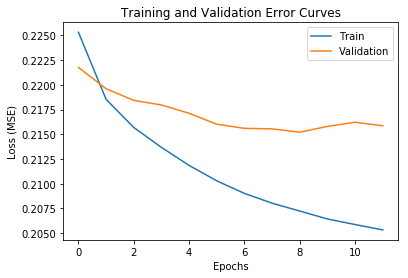

In [16]:
plot_training_error_curves(history)

### Predições no Conjunto de Teste

Matriz de confusão no conjunto de teste:
[[28073  5452]
 [47676 16099]]

Train Loss:       0.2072
Validation Loss:  0.2152

Performance no conjunto de teste:


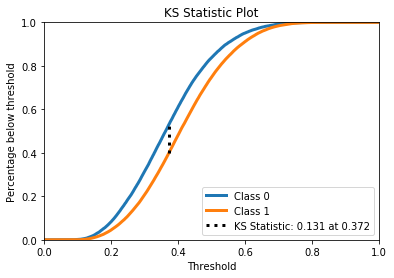


Accuracy:         0.4540
Recall:           0.2524
Precision:        0.7470
F1:               0.3774
AUROC:            0.5913
AUPR:             0.7207


In [17]:
# Fazer predições no conjunto de teste
y_pred_scores = classifier.predict(X_test)
y_pred_class = classifier.predict_classes(X_test, verbose=0)
y_pred_scores_0 = 1 - y_pred_scores
y_pred_scores = np.concatenate([y_pred_scores_0, y_pred_scores], axis=1)

## Matriz de confusão
print('Matriz de confusão no conjunto de teste:')
print(confusion_matrix(y_test, y_pred_class))

## Resumo dos resultados
losses = extract_final_losses(history)
print()
print("{metric:<18}{value:.4f}".format(metric="Train Loss:", value=losses['train_loss']))
print("{metric:<18}{value:.4f}".format(metric="Validation Loss:", value=losses['val_loss']))
print('\nPerformance no conjunto de teste:')
accuracy, recall, precision, f1, auroc, aupr = compute_performance_metrics(y_test, y_pred_class, y_pred_scores)
print_metrics_summary(accuracy, recall, precision, f1, auroc, aupr)

# Comparando MLPs com outros classificadores

In [18]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, VotingClassifier

In [19]:
def create_sklearn_compatible_model():
    model = Sequential()
    model.add(Dense(20, activation='tanh', input_dim=input_dim))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

### MLP

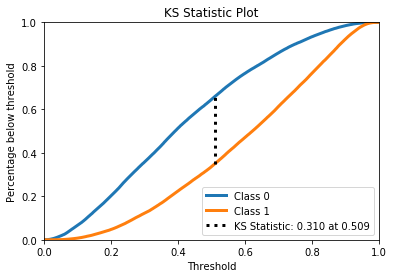

Performance no conjunto de validação:

Accuracy:         0.6543
Recall:           0.6633
Precision:        0.6515
F1:               0.6574
AUROC:            0.7133
AUPR:             0.6991


In [20]:
mlp_clf = KerasClassifier(build_fn=create_sklearn_compatible_model, 
                          batch_size=64, epochs=100,
                          verbose=0)
mlp_clf.fit(X_train0, y_train0)
mlp_pred_class = mlp_clf.predict(X_val0)
mlp_pred_scores = mlp_clf.predict_proba(X_val0)
accuracy, recall, precision, f1, auroc, aupr = compute_performance_metrics(y_val0, mlp_pred_class, mlp_pred_scores)
print('Performance no conjunto de validação:')
print_metrics_summary(accuracy, recall, precision, f1, auroc, aupr)

### SVM

C:\Users\cinth\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


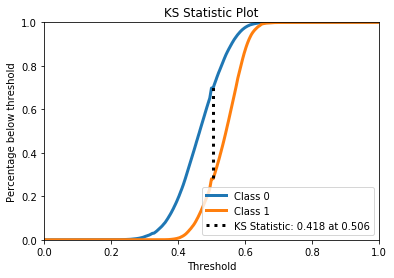

Performance no conjunto de validação:

Accuracy:         0.7093
Recall:           0.7508
Precision:        0.6932
F1:               0.7209
AUROC:            0.7831
AUPR:             0.7514


In [23]:
svc_clf = SVC(probability=True)  # Modifique aqui os hyperparâmetros
svc_clf.fit(X_train0, y_train0)
svc_pred_class = svc_clf.predict(X_val0)
svc_pred_scores = svc_clf.predict_proba(X_val0)
accuracy, recall, precision, f1, auroc, aupr = compute_performance_metrics(y_val0, svc_pred_class, svc_pred_scores)
print('Performance no conjunto de validação:')
print_metrics_summary(accuracy, recall, precision, f1, auroc, aupr)

### Random Forest

C:\Users\cinth\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


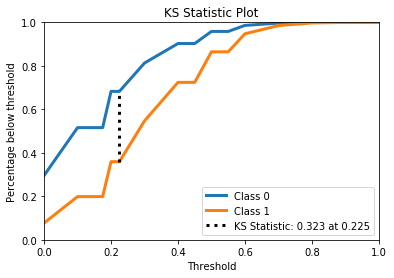


Accuracy:         0.5469
Recall:           0.1356
Precision:        0.7646
F1:               0.2303
AUROC:            0.7128
AUPR:             0.6678


In [21]:
rf_clf = RandomForestClassifier()  # Modifique aqui os hyperparâmetros
rf_clf.fit(X_train0, y_train0)
rf_pred_class = rf_clf.predict(X_val0)
rf_pred_scores = rf_clf.predict_proba(X_val0)
accuracy, recall, precision, f1, auroc, aupr = compute_performance_metrics(y_val0, rf_pred_class, rf_pred_scores)
print_metrics_summary(accuracy, recall, precision, f1, auroc, aupr)

### Gradient Booster

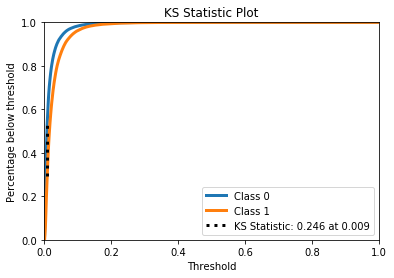


Accuracy:         0.5000
Recall:           0.0001
Precision:        0.8571
F1:               0.0002
AUROC:            0.6659
AUPR:             0.6290


In [22]:
gb_clf = GradientBoostingClassifier()  # Modifique aqui os hyperparâmetros
gb_clf.fit(X_train0, y_train0)
gb_pred_class = gb_clf.predict(X_val0)
gb_pred_scores = gb_clf.predict_proba(X_val0)
accuracy, recall, precision, f1, auroc, aupr = compute_performance_metrics(y_val0, gb_pred_class, gb_pred_scores)
print_metrics_summary(accuracy, recall, precision, f1, auroc, aupr)


### Ensemble MLP, SVM, Random Forest, Gradient Booster

C:\Users\cinth\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\cinth\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


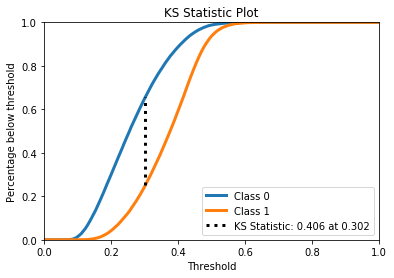


Accuracy:         0.5257
Recall:           0.0638
Precision:        0.8380
F1:               0.1185
AUROC:            0.7720
AUPR:             0.7412


In [24]:
mlp_ens_clf = KerasClassifier(build_fn=create_sklearn_compatible_model,
                              batch_size=64, epochs=50, verbose=0)
svc_ens_clf = SVC(probability=True)
gb_ens_clf = GradientBoostingClassifier()
rf_ens_clf = RandomForestClassifier()
ens_clf = VotingClassifier([('mlp', mlp_ens_clf), ('svm', svc_ens_clf), ('gb', gb_ens_clf), ('rf', rf_ens_clf)], 
                           voting='soft')

ens_clf.fit(X_train0, y_train0)
ens_pred_class = ens_clf.predict(X_val0)
ens_pred_scores = ens_clf.predict_proba(X_val0)
accuracy, recall, precision, f1, auroc, aupr = compute_performance_metrics(y_val0, ens_pred_class, ens_pred_scores)
print_metrics_summary(accuracy, recall, precision, f1, auroc, aupr)

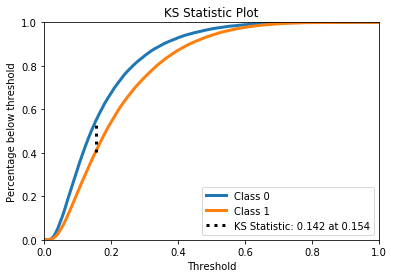

MLP

Accuracy:         0.3729
Recall:           0.0592
Precision:        0.7874
F1:               0.1101
AUROC:            0.5956
AUPR:             0.7256


C:\Users\cinth\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\cinth\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


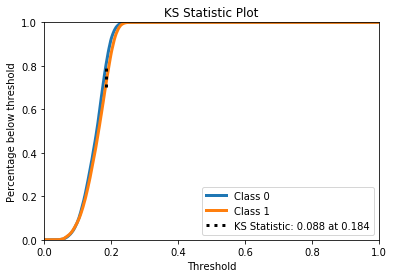



Support Vector Machine

Accuracy:         0.3446
Recall:           0.0000
Precision:        0.0000
F1:               0.0000
AUROC:            0.5472
AUPR:             0.7074


C:\Users\cinth\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\cinth\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


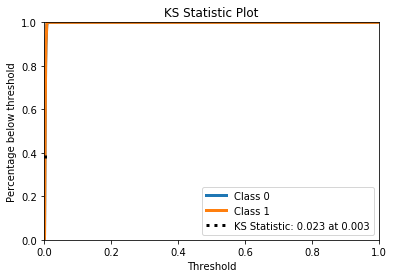



Gradient Boosting

Accuracy:         0.3446
Recall:           0.0000
Precision:        0.0000
F1:               0.0000
AUROC:            0.5013
AUPR:             0.6530


C:\Users\cinth\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\cinth\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


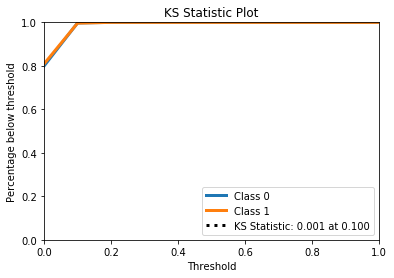



Random Forest

Accuracy:         0.3446
Recall:           0.0000
Precision:        0.0000
F1:               0.0000
AUROC:            0.4954
AUPR:             0.6536


In [ ]:
mlp_pred_class = mlp_clf.predict(X_test)
mlp_pred_scores = mlp_clf.predict_proba(X_test)
accuracy, recall, precision, f1, auroc, aupr = compute_performance_metrics(y_test, mlp_pred_class, mlp_pred_scores)
print('MLP')
print_metrics_summary(accuracy, recall, precision, f1, auroc, aupr)

svc_pred_class = svc_clf.predict(X_test)
svc_pred_scores = svc_clf.predict_proba(X_test)
accuracy, recall, precision, f1, auroc, aupr = compute_performance_metrics(y_test, svc_pred_class, svc_pred_scores)
print('\n\nSupport Vector Machine')
print_metrics_summary(accuracy, recall, precision, f1, auroc, aupr)

gb_pred_class = gb_clf.predict(X_test)
gb_pred_scores = gb_clf.predict_proba(X_test)
accuracy, recall, precision, f1, auroc, aupr = compute_performance_metrics(y_test, gb_pred_class, gb_pred_scores)
print('\n\nGradient Boosting')
print_metrics_summary(accuracy, recall, precision, f1, auroc, aupr)

rf_pred_class = rf_clf.predict(X_test)
rf_pred_scores = rf_clf.predict_proba(X_test)
accuracy, recall, precision, f1, auroc, aupr = compute_performance_metrics(y_test, rf_pred_class, rf_pred_scores)
print('\n\nRandom Forest')
print_metrics_summary(accuracy, recall, precision, f1, auroc, aupr)

ens_pred_class = ens_clf.predict(X_test)
ens_pred_scores = ens_clf.predict_proba(X_test)
accuracy, recall, precision, f1, auroc, aupr = compute_performance_metrics(y_test, ens_pred_class, ens_pred_scores)
print('\n\nEnsemble')
print_metrics_summary(accuracy, recall, precision, f1, auroc, aupr)